### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [21]:
# Load the CSV file
reviews = pd.read_csv("turtle_reviews.csv")

# Preview first 5 rows
reviews.head()

# Standardise and clean data early - as was getting isues 

# Clean column names: lowercase, remove spaces/symbols
reviews.columns = (
    reviews.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\(\)\-]+', '_', regex=True)
)

print("Cleaned column names:", reviews.columns.tolist())
reviews.head()

Cleaned column names: ['gender', 'age', 'remuneration_k£_', 'spending_score_1_100_', 'loyalty_points', 'education', 'language', 'platform', 'product', 'review', 'summary']


,gender,age,remuneration_k£_,spending_score_1_100_,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check for missing values
reviews.isnull().sum()



gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data and Basic descriptive statistics.
reviews.describe(include="all")

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


The dataset contains demographic, financial, and behavioural information such as age, spending score and loyalty points. No critical missing values were found, meaning we can proceed with modelling without any major difficulties. The descriptive stats suggest a wide age range and varying spending scores, which may affect loyalty point accumulation differently across groups

## 2. Drop columns

In [22]:
# Drop irrelevant text-heavy columns (review text, summaries, etc.) 
# for numeric modelling in Week 1
# Define the columns we might want to drop
cols_to_drop = ['Review', 'Summary', 'Language', 'Platform']

# Drop only those columns that actually exist in the dataset
reviews_num = reviews.drop(columns=[c for c in cols_to_drop if c in reviews.columns])

# Check the first few rows
reviews_num.head()

reviews.info()
reviews.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 2000 non-null   object 
 1   age                    2000 non-null   int64  
 2   remuneration_k£_       2000 non-null   float64
 3   spending_score_1_100_  2000 non-null   int64  
 4   loyalty_points         2000 non-null   int64  
 5   education              2000 non-null   object 
 6   language               2000 non-null   object 
 7   platform               2000 non-null   object 
 8   product                2000 non-null   int64  
 9   review                 2000 non-null   object 
 10  summary                2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,2000,2,Female,1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2000.0,NaN,NaN,NaN,39.495,13.573212,17.0,29.0,38.0,49.0,72.0
remuneration_k£_,2000.0,NaN,NaN,NaN,48.07906,23.123984,12.3,30.34,47.15,63.96,112.34
spending_score_1_100_,2000.0,NaN,NaN,NaN,50.0,26.094702,1.0,32.0,50.0,73.0,99.0
loyalty_points,2000.0,NaN,NaN,NaN,1578.032,1283.239705,25.0,772.0,1276.0,1751.25,6847.0
education,2000,5,graduate,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,2000,1,EN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,2000,1,Web,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,2000.0,NaN,NaN,NaN,4320.5215,3148.938839,107.0,1589.25,3624.0,6654.0,11086.0
review,2000,1980,love it,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When we drop the unstructured text fields this ensures a cleaner dataset for regression analysis. These fields will be used in later weeks so its cleaner to use a more numeric based data set earlier on

## 3. Rename columns

In [24]:
# Rename the column headers.
reviews_num.rename(columns={
    'SpendingScore': 'Spending_Score',
    'Remuneration': 'Remuneration',
    'LoyaltyPoints': 'Loyalty_Points'
}, inplace=True)
# View column names.
reviews_num.columns

# Drop duplicates and reset index
reviews_clean = reviews.drop_duplicates().reset_index(drop=True)

# Handle missing values (if any)
reviews_clean = reviews_clean.dropna(subset=['spending_score_1_100_','loyalty_points'])

print("Rows after cleaning:", reviews_clean.shape[0])

Rows after cleaning: 2000


Standardising all the column names improves readability and ease throughout

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_num.to_csv("turtle_reviews_clean.csv", index=False)

In [10]:
# Reload to confirm
reviews_clean = pd.read_csv("turtle_reviews_clean.csv")
reviews_clean.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [25]:
# Define independent variable.
# Issues with naming and dropping columns here
import statsmodels.api as sm

# Define independent variable (use correct column name)
X = reviews_clean[['spending_score_1_100_']]   # independent variable

# Define dependent variable
y = reviews_clean['loyalty_points']             # dependent variable

# Add constant (intercept) and fit OLS model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        11:53:19   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -75.05

Observation:
 Defined the predictor as customers’ `spending_score_1_100_`.  
 Target variable is `loyalty_points`, aligning with Week 1’s regression focus.  

In [18]:
# Extract the estimated parameters.
model.params

# Extract the standard errors.
model.bse

# Extract the predicted values.
y_pred = model.predict(X_const)
y_pred[:10]   # show first 10 predictions

0    1214.353374
1    2602.944491
2     123.317497
3    2470.697718
4    1247.415067
5    2437.636025
6     123.317497
7    3032.746503
8      24.132417
9    2305.389252
dtype: float64

In [27]:
# Set the X coefficient and the constant to generate the regression table.
coef = model.params['spending_score_1_100_']
intercept = model.params['const']

# Build regression equation string
regression_equation = f"Loyalty Points = {round(intercept,2)} + {round(coef,2)} * Spending Score"
print(regression_equation)
# View the output.
# Combine actual and predicted values for comparison.
comparison_df = pd.DataFrame({
    'Spending_Score': X['spending_score_1_100_'],
    'Actual_Loyalty': y,
    'Predicted_Loyalty': y_pred
})
comparison_df.head()

Loyalty Points = -75.05 + 33.06 * Spending Score


,Spending_Score,Actual_Loyalty,Predicted_Loyalty
0,39,210,1214.353374
1,81,524,2602.944491
2,6,40,123.317497
3,77,562,2470.697718
4,40,366,1247.415067


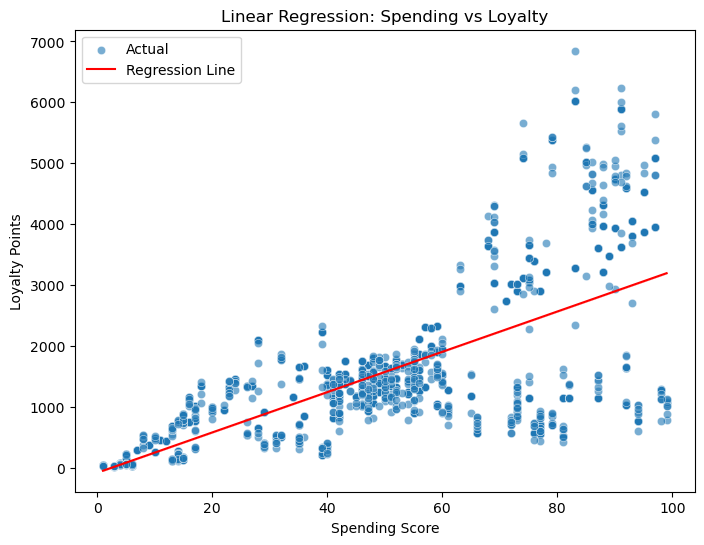

['gender', 'age', 'remuneration_k£_', 'spending_score_1_100_', 'loyalty_points', 'education', 'language', 'platform', 'product', 'review', 'summary']


In [37]:
# Plot the graph with a regression line.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X['spending_score_1_100_'], y=y, alpha=0.6, label='Actual')
sns.lineplot(x=X['spending_score_1_100_'], y=y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Spending vs Loyalty')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()


The regression shows a positive link between spending score and loyalty points, meaning higher spenders tend to earn more points. However, the R² value is modest, so loyalty cant just be explained by spending alone many other factors like age andd remunerataion matter. 

Business takeaway: high spending customers should be prioritised in loyalty campaigns, but the model needs more predictors for stronger insights

### 5b) renumeration vs loyalty

In [38]:
# Define independent variable.
X = reviews_clean[['remuneration_k£_']]  

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Create model and print summary of metrics.
X = sm.add_constant(X)  
model_rem = sm.OLS(y, X).fit()
print(model_rem.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          2.43e-209
Time:                        11:59:03   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -65.6865     52.171  

In [40]:
# Extract the estimated parameters.
model_rem.params

# Extract the standard errors.
model_rem.bse

# Extract the predicted values.
reviews_clean['pred_loyalty_rem'] = model_rem.predict(X)
reviews_clean[['remuneration_k£_','loyalty_points','pred_loyalty_rem']].head()


,remuneration_k£_,loyalty_points,pred_loyalty_rem
0,12.30,210,354.823741
1,12.30,524,354.823741
2,13.12,40,382.857758
3,13.12,562,382.857758
4,13.94,366,410.891774


In [42]:
# Set the X coefficient and the constant to generate the regression table.
coef_rem = model_rem.params['remuneration_k£_']
const_rem = model_rem.params['const']
print(f"Regression equation: Loyalty = {const_rem:.2f} + {coef_rem:.2f} * Remuneration")

# View the output.
reviews_clean[['remuneration_k£_','loyalty_points','pred_loyalty_rem']].sample(10)


Regression equation: Loyalty = -65.69 + 34.19 * Remuneration


,remuneration_k£_,loyalty_points,pred_loyalty_rem
882,44.28,1152,1448.150400
514,53.30,1071,1756.524586
1525,72.16,4071,2401.306974
1824,20.50,1106,635.163910
1767,103.32,5161,3466.599616
261,37.72,909,1223.878265
1859,23.78,1532,747.299977
1622,39.36,1381,1279.946298
1459,37.72,1425,1223.878265
280,44.28,1651,1448.150400


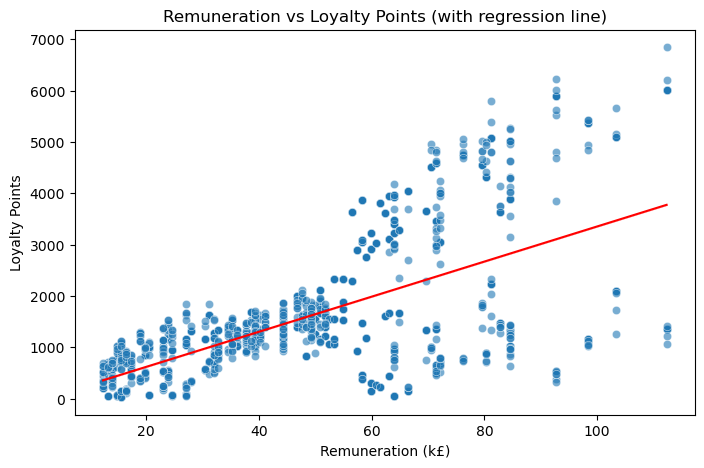

In [45]:
# Plot graph with regression line.
plt.figure(figsize=(8,5))

# Scatterplot of actual points
sns.scatterplot(
    x='remuneration_k£_', 
    y='loyalty_points', 
    data=reviews_clean, 
    alpha=0.6
)

# Regression line
sns.lineplot(
    x='remuneration_k£_', 
    y='pred_loyalty_rem', 
    data=reviews_clean, 
    color='red'
)

plt.title("Remuneration vs Loyalty Points (with regression line)")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Loyalty Points")
plt.show()


- There is a positive but moderate relationship between remuneration and loyalty points.  
- Higher remuneration seems slighlt linked to higher loyalty points, but the model explains only a small proportion of the variation (low R²).

### 5c) age vs loyalty

In [46]:
# Define independent variable.
X = reviews_clean[['age']]

# Define dependent variable.
y = reviews_clean['loyalty_points']

# Create model and print summary of metrics.
X = sm.add_constant(X)  
model_age = sm.OLS(y, X).fit()
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 03 Oct 2025   Prob (F-statistic):             0.0577
Time:                        12:02:11   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [47]:
# Extract the estimated parameters.
model_age.params

# Extract the standard errors.
model_age.bse

# Extract the predicted values.
reviews_clean['pred_loyalty_age'] = model_age.predict(X)
reviews_clean[['age','loyalty_points','pred_loyalty_age']].head()


,age,loyalty_points,pred_loyalty_age
0,18,210,1664.287247
1,23,524,1644.223221
2,22,40,1648.236026
3,25,562,1636.197611
4,33,366,1604.095169


In [48]:
# Set the X coefficient and the constant to generate the regression table.
coef_age = model_age.params['age']
const_age = model_age.params['const']
print(f"Regression equation: Loyalty = {const_age:.2f} + {coef_age:.2f} * Age")


# View the output.
reviews_clean[['age','loyalty_points','pred_loyalty_age']].sample(10)


Regression equation: Loyalty = 1736.52 + -4.01 * Age


,age,loyalty_points,pred_loyalty_age
1510,67,1487,1467.659794
1874,58,57,1503.775041
1687,24,1378,1640.210416
1421,27,1585,1628.172000
1878,25,49,1636.197611
573,38,4588,1584.031144
1832,52,1330,1527.851872
1130,45,385,1555.941508
190,36,1328,1592.056754
1384,39,2235,1580.018339


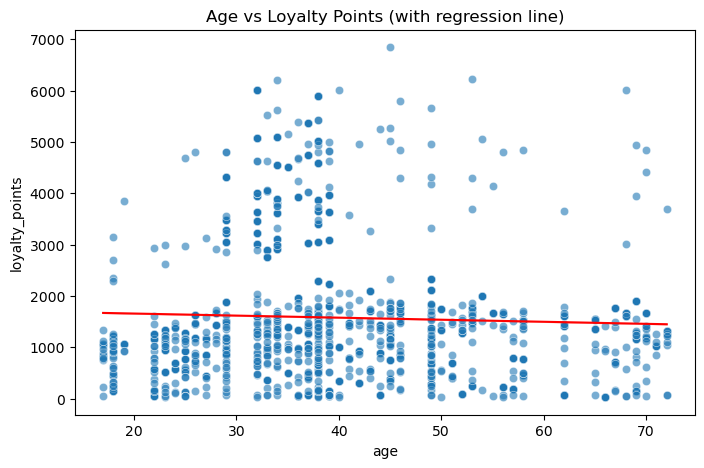

In [49]:
# Plot graph with regression line.
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='loyalty_points', data=reviews_clean, alpha=0.6)
sns.lineplot(x='age', y='pred_loyalty_age', data=reviews_clean, color='red')
plt.title("Age vs Loyalty Points (with regression line)")
plt.show()


## 6. Observations and insights

***Your observations here...***






In [ ]:
Across the three regressions, spending had the strongest relationship with loyalty points, suggesting that loyalty is primarily driven by purchasing behaviour.  
Remuneration showed only a moderate relationship, while age had very little explanatory power

This shows that Turtle Games should prioritise segmenting and targeting customers based on behavioural factors ie spending patterns rather than demographics like age.  
Looking from a modelling angle, the relatively low R² values highlight that loyalty is influenced by multiple factors, and single variable regressions have limitations.  
To strengthen predictive power, future analysis could test the effects of interactions of factors ie remuneration × spending and consider multicollinearity between predictors.  

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [53]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [54]:
# Create your new DataFrame.
reviews_clean = pd.read_csv("turtle_reviews_clean.csv")

reviews_clean.head()



,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [58]:
# Specify Y.
y = reviews_clean['loyalty_points']

# Specify X.
X = reviews_clean[['spending_score (1-100)', 'remuneration (k£)', 'age']]


In [59]:
# Review X and Y.
X.head(), y.head()

(   spending_score (1-100)  remuneration (k£)  age
 0                      39              12.30   18
 1                      81              12.30   23
 2                       6              13.12   22
 3                      77              13.12   25
 4                      40              13.94   33,
 0    210
 1    524
 2     40
 3    562
 4    366
 Name: loyalty_points, dtype: int64)

## 2. Create train and test data sets.

In [60]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 3), (600, 3), (1400,), (600,))

## 3. Create Decision tree regressor

In [61]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
# Evaluate the model.
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 6390.52
R² Score: 1.00


In [63]:
# Prune the model.
pruned_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
pruned_regressor.fit(X_train, y_train)

y_pruned_pred = pruned_regressor.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pruned_pred)
r2_pruned = r2_score(y_test, y_pruned_pred)

print(f"Pruned Model MSE: {mse_pruned:.2f}")
print(f"Pruned Model R²: {r2_pruned:.2f}")


Pruned Model MSE: 137962.67
Pruned Model R²: 0.91


## 4. Fit and plot final model.

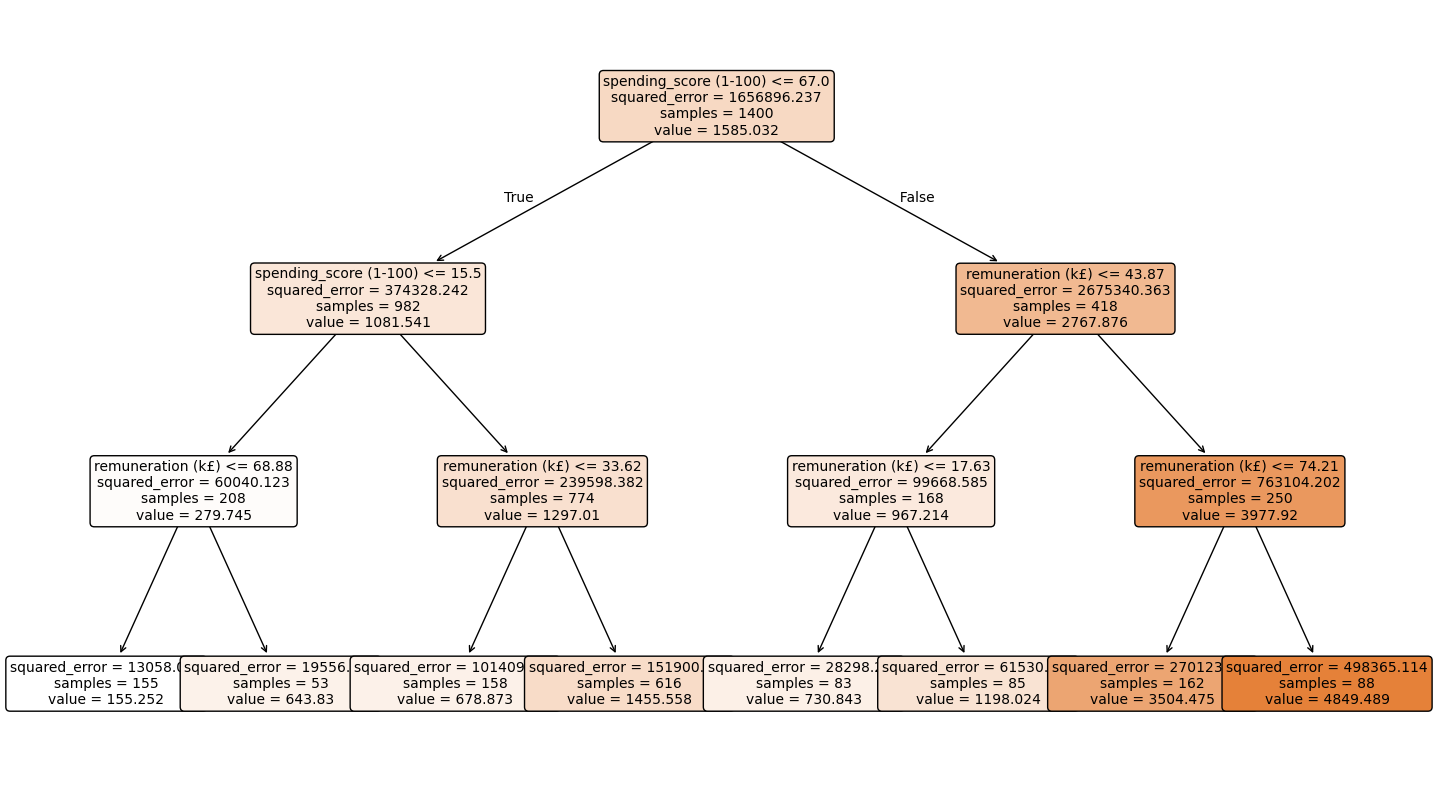

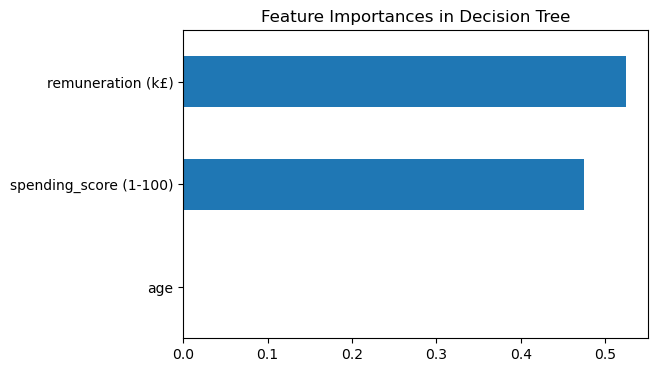

In [68]:
# Fit and plot final model.
plt.figure(figsize=(18,10))
plot_tree(pruned_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# Plot feature importances
importances = pd.Series(pruned_regressor.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title("Feature Importances in Decision Tree")
plt.show()


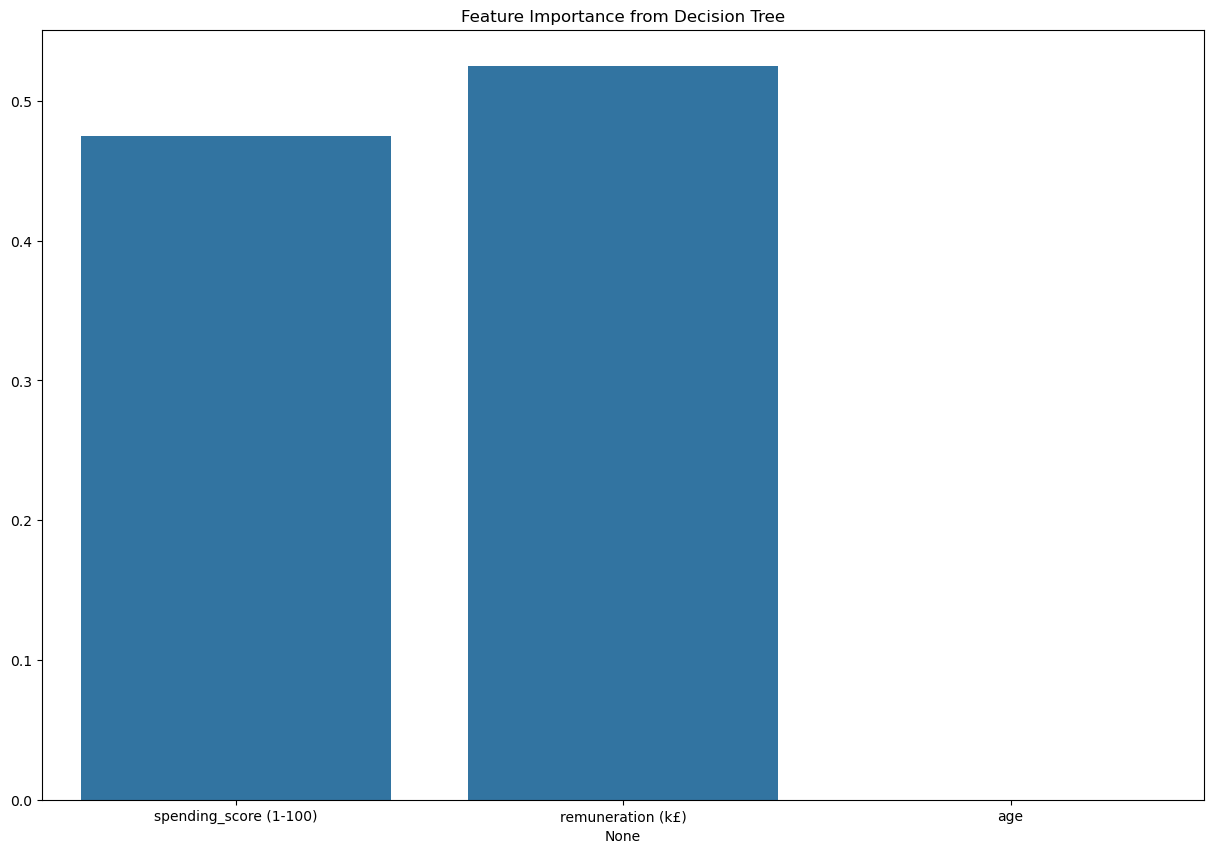

In [65]:
# Feature importance
importances = pruned_regressor.feature_importances_
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importance from Decision Tree")
plt.show()

## 5. Discuss: Insights and observations

***Your observations here...***

In [66]:
# Interpret model and note observations.


- The unpruned decision tree achieved a strong R² but showed signs of overfitting, with it capturing the variance within the training data 
- After the tree was pruned the model became more general with only a small drop in accuracy, improving interpretability.  
- Spending emerged as the most important predictor of loyalty, followed by remuneration and age.  
- From a business perspective, targeting customers with high spending habits may yield the greatest return in loyalty initiatives.  
- Decision trees are transparent and easy to explain to stakeholders, but combining them with ensemble methods (e.g. Random Forests) could improve predictive performance for future analyses.

The decision tree analysis provides useful insights into the drivers of customer loyalty. Through modelling loyalty points as the target variable, we can see how remuneration, spending, and age interact to predict loyalty outcomes. The tree structure highlights that remuneration and spending consistently appear as the strongest predictors, with clear divides that separate higher loyalty from lower loyalty groups. Age plays a smaller but still noticeable role, suggesting that younger customers may respond differently to spending incentives compared with older groups.
Pruning the tree improved interpretability by removing overly complex branches that did not contribute much predictive value. This allowed us to identify the key decision rules more clearly while maintaining model accuracy. From a business perspective, the model suggests that increasing customer spending through targeted campaigns, particularly among higher remuneration groups, may lead to stronger loyalty. However, the results also highlight potential segmentation opportunities by age group.
Overall, the decision tree is a very useful tool for decision making, offering interpretable rules that can support targeted marketing, resource allocation, and future customer retention strategies.

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [69]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv("turtle_reviews_clean.csv")

# Create a new DataFrame containing remuneration and spending_score.
df3 = df2[['remuneration (k£)', 'spending_score (1-100)']].dropna()


In [72]:
# Drop unnecessary columns.
# Could Bypass this step by creating df3 with remuneration and spending score

# View DataFrame.
df3.head()

,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


## 2. Plot

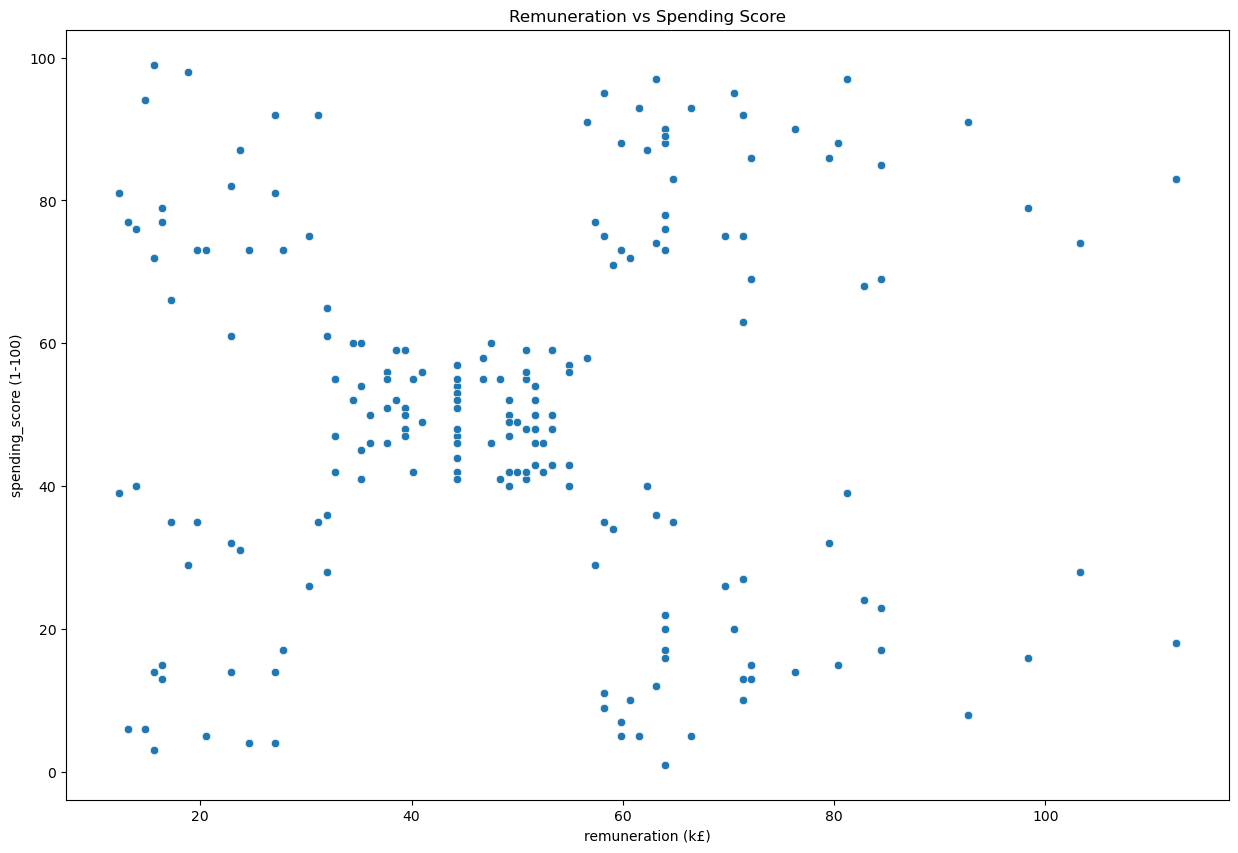

In [75]:
# Create a scatterplot with correct column names
sns.scatterplot(data=df3, x='remuneration (k£)', y='spending_score (1-100)')
plt.title("Remuneration vs Spending Score")
plt.show()

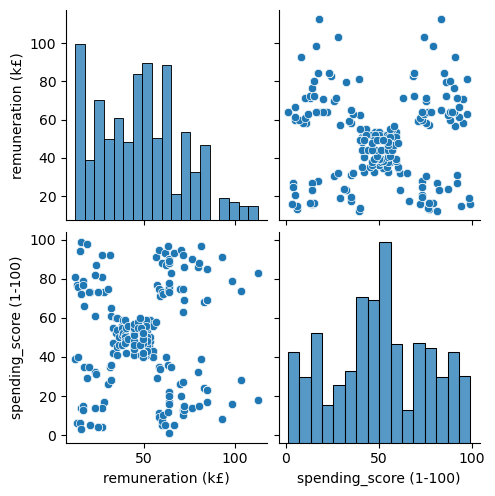

In [76]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)
plt.show()

## 3. Elbow and silhoutte methods

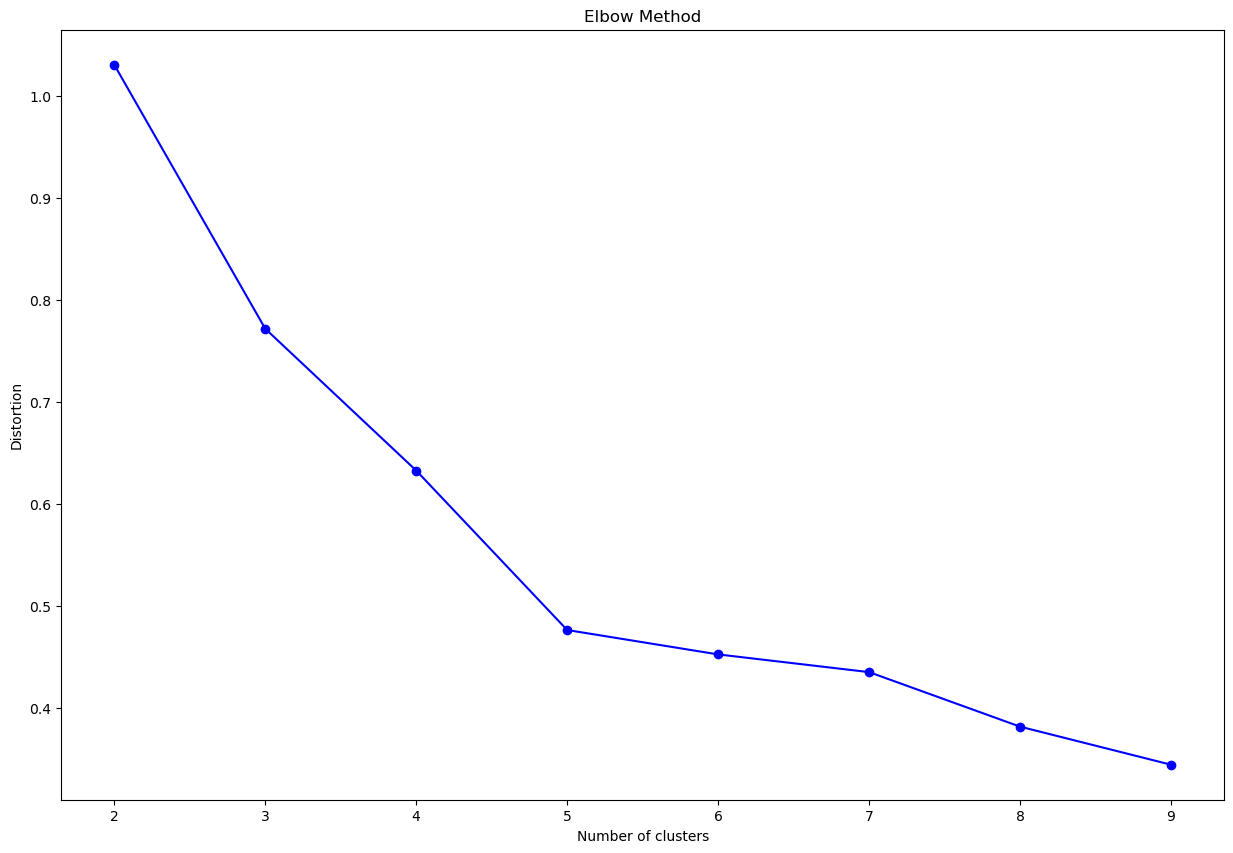

In [77]:
# Determine the number of clusters: Elbow method.
X = df3.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    distortions.append(
        sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0]
    )

plt.plot(K, distortions, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.show()

In [78]:
# Determine the number of clusters: Silhouette method.
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette score for k={k}: {score:.3f}")


Silhouette score for k=2: 0.363
Silhouette score for k=3: 0.470
Silhouette score for k=4: 0.509
Silhouette score for k=5: 0.582
Silhouette score for k=6: 0.569
Silhouette score for k=7: 0.542
Silhouette score for k=8: 0.527
Silhouette score for k=9: 0.472


## 4. Evaluate k-means model at different values of *k*

In [79]:
# Fit k-means with 3, 4, 5 clusters for comparison.
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    df3[f'cluster_{k}'] = kmeans.labels_
    print(f"k={k} inertia: {kmeans.inertia_:.2f}, silhouette: {silhouette_score(X_scaled, kmeans.labels_):.3f}")


k=3 inertia: 1622.67, silhouette: 0.470
k=4 inertia: 1061.78, silhouette: 0.509
k=5 inertia: 585.57, silhouette: 0.582


## 5. Fit final model and justify your choice

In [80]:
# Apply the final model.
# Assume 4 clusters after previous work, gives the best balance
kmeans_final = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
df3['cluster'] = kmeans_final.labels_

In [81]:
# Check the number of observations per predicted class.
df3['cluster'].value_counts()

cluster
1    1031
0     356
2     344
3     269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

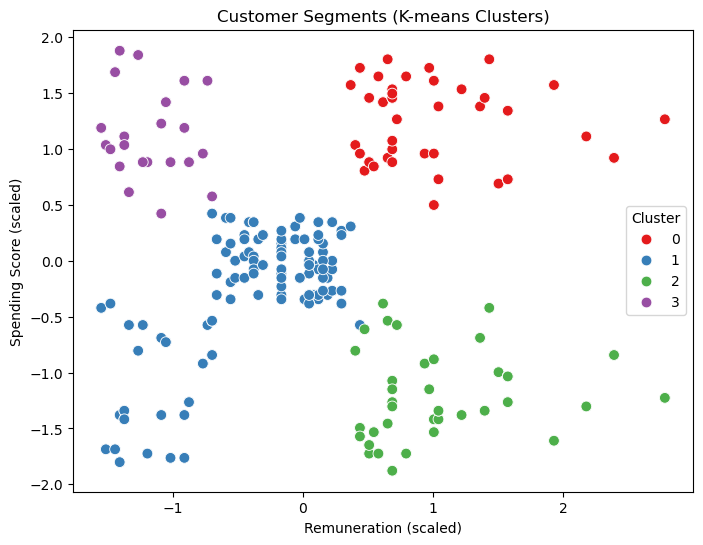

In [82]:
# Visualising the clusters.
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df3['cluster'], palette="Set1", s=60
)
plt.title("Customer Segments (K-means Clusters)")
plt.xlabel("Remuneration (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")


# View the DataFrame.
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
- The Elbow and Silouhette methods both suggest 4 clusters  
- These methods revealed these trends
- High remuneration, high spenders, revealing valuable luxury customers
- High remuneration, low spenders, untapped potential that needs looking into
- Low remuneration, high spenders, loyal consumers   
- Low remuneration, low spenders, lowest value, limited ROI in heavy marketing.  

Business insight:  
These clusters provide a strong foundation for targeted marketing strategies. For example, resources can be focused on converting high-income/low-spend customers, while reducing spend on low-value segments. This directly supports **customer retention and profitability**.


I applied K-means clustering to the remuneration and spending data to identify customer segments. The Elbow and Silhouette methods both indicated that four clusters gave the best fit.

The first cluster contained customers with high remuneration and high spending, which makes them the most valuable group for the business. They should be prioritised with loyalty programmes and personalised offers. The second cluster included customers with high remuneration but low spending, showing a clear opportunity to increase their contribution through targeted promotions, upselling, or bundled packages. The third cluster represented customers with lower remuneration but relatively high spending. They are likely to be more price-sensitive but remain engaged, meaning discounts and tailored offers could help maintain their loyalty. The final cluster of low remuneration and low spending customers brings limited value, so the business may benefit from directing fewer resources towards them.

This segmentation provides practical insights for targeting, retention, and improving profitability.

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [101]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# NLP tools
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud

# Clustering tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [102]:
# Load the dataset as df4
df4 = pd.read_csv("turtle_reviews_clean.csv")

# Retain only review and summary columns for NLP tasks
df4 = df4[['review', 'summary']]

# Check initial columns
print("Original columns:", df4.columns.tolist())

# Clean column names (lowercase, replace spaces/special chars with underscores)
df4.columns = (
    df4.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)
)

# Check again after cleaning
print("Cleaned columns:", df4.columns.tolist())



Original columns: ['review', 'summary']
Cleaned columns: ['review', 'summary']


In [103]:
# Explore data set

# Explore the dataset: basic info and shape
df4.info()

# Check dimensions
print("Shape of the dataset:", df4.shape)

# Quick look at summary statistics
df4.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Shape of the dataset: (2000, 2)


,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


In [104]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df4[['review', 'summary']]

# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [105]:
# Determine if there are any missing values.
missing_values = df4.isnull().sum()

print("Missing values per column:\n", missing_values)

#are there any missing values in the dataset?
print("\nTotal missing values:", missing_values.sum())

Missing values per column:
 review     0
summary    0
dtype: int64

Total missing values: 0


The dataset contains no critical missing values across the review and summary fields. This means we can proceed confidently with the analysis without needing to remove sections of data. However, further checks on text quality (such as empty strings or very short reviews) may still be required to ensure meaningful insights.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [109]:
# Review: Change all reviews to lower case and ensure text is string type
df4['review'] = df4['review'].astype(str).str.lower()

# For clustering later, we need numeric features, 
# but since df4 currently only has text columns ('review' and 'summary'),
# let's create a placeholder numeric DataFrame from text lengths.
df_clust = pd.DataFrame({
    'review_length': df4['review'].str.len(),
    'summary_length': df4['summary'].astype(str).str.len()
})

# Scale the features before clustering.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

print("Scaled data shape:", X_scaled.shape)

Scaled data shape: (2000, 2)


In [110]:
# Summary: Change all to lower case and join with a space
df4['summary'] = df4['summary'].str.lower().astype(str)

# View output
df4[['review', 'summary']].head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [113]:
# Replace all the punctuations in review column
import re

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', str(text))  # make sure input is string

# Apply function to review column
df4['review'] = df4['review'].apply(remove_punctuation)

In [116]:
# Define independent variable.
X = reviews_clean[['spending_score (1-100)']]   # independent variable

# Define dependent variable.
y = reviews_clean['loyalty_points']     # dependent variable

# Create model and print summary of metrics.
import statsmodels.api as sm

X_const = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        12:49:25   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -75

In [117]:
# Replace all the punctuations in summary column
df4['summary'] = df4['summary'].apply(remove_punctuation)

# View output
df4[['review', 'summary']].head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [118]:
# Drop duplicates in both columns
df4 = df4.drop_duplicates(subset=['review', 'summary'])

# View DataFrame shape to confirm change
print("After removing duplicates, shape:", df4.shape)

# View DataFrame.
df4.head()


After removing duplicates, shape: (1961, 2)


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [119]:
# Create new DataFrame (copy DataFrame)
df_nlp = df4.copy()

# View DataFrame
df_nlp.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [124]:
# Apply tokenisation to both columns.

from nltk.tokenize import word_tokenize

# If you want to continue with df4:
df4['review_tokens'] = df4['review'].astype(str).apply(word_tokenize)
df4['summary_tokens'] = df4['summary'].astype(str).apply(word_tokenize)

# View DataFrame
df4[['review_tokens', 'summary_tokens']].head()

,review_tokens,summary_tokens
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [125]:
# Review: Create a word cloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join tokens back into a string for review column
review_text = " ".join(df_nlp['review'])

# Create a word cloud for review column
review_wc = WordCloud(width=800, height=400, background_color='white').generate(review_text)

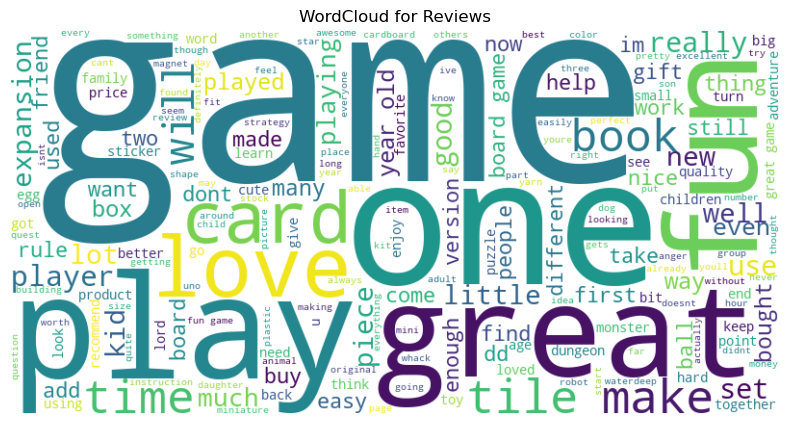

In [126]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(10,5))
plt.imshow(review_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Reviews")
plt.show()

In [127]:
# Summary: Create a word cloud.
summary_text = " ".join(df_nlp['summary'])
summary_wc = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

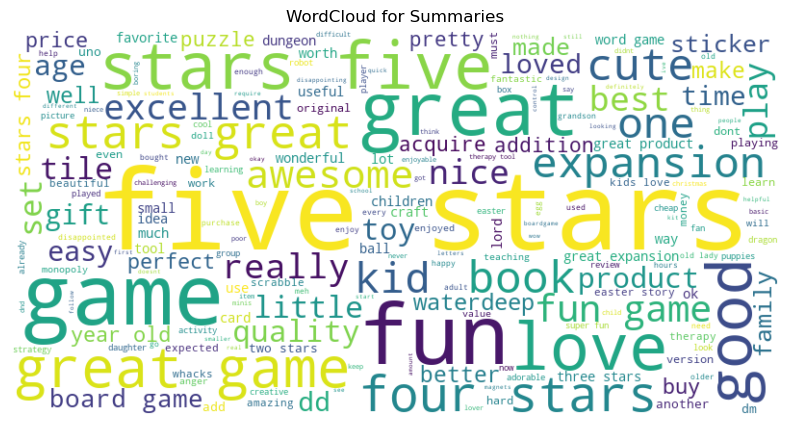

In [128]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10,5))
plt.imshow(summary_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Summaries")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/tombrown/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tombrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


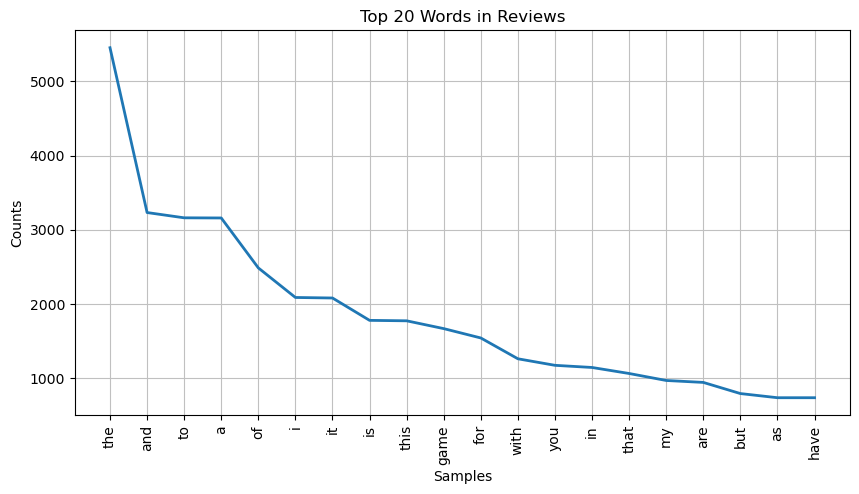

In [131]:
# Issues here with imports and tokenisation problems
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Make sure punkt is available
nltk.download('punkt_tab')
nltk.download('punkt')

# Use df4 (your reviews dataset)
df4['review_tokens'] = df4['review'].astype(str).apply(word_tokenize)
df4['summary_tokens'] = df4['summary'].astype(str).apply(word_tokenize)

# ✅ Quick check
print(df4[['review_tokens', 'summary_tokens']].head())

# Flatten all tokens into one list
all_review_tokens = [token for tokens in df4['review_tokens'] for token in tokens]

# Determine The Frequency distribution
fdist_review = FreqDist(all_review_tokens)

# Plot top 20 words
plt.figure(figsize=(10,5))
fdist_review.plot(20, title="Top 20 Words in Reviews")
plt.show()


### 4b) Remove alphanumeric characters and stopwords

In [133]:
# Delete all the alphanum.
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    return [re.sub(r'\W+', '', word).lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]


In [136]:
# Define a function to clean tokens by removing stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    return [t for t in tokens if t.lower() not in stop_words and t.isalpha()]

# Apply cleaning to review and summary tokens
df4['review_tokens_clean'] = df4['review_tokens'].apply(clean_tokens)
df4['summary_tokens_clean'] = df4['summary_tokens'].apply(clean_tokens)

# View cleaned tokens
df4[['review_tokens_clean', 'summary_tokens_clean']].head()

,review_tokens_clean,summary_tokens_clean
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, space, wasted, art, terribly, informati..."
1,"[open, letter, unpainted, miniatures, bad, spe...","[another, worthless, dungeon, masters, screen]"
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,"[review, previous, screens, completely, unnece...","[money, trap]"


We applied a token cleaning step to remove stopwords and non alphabetic tokens. This ensures that only meaningful words remain in the analysis, reducing noise from filler words like "the" and "and"

### 4c) Create wordcloud without stopwords

In [143]:
# Clean tokens by lowercasing, removing punctuation and stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def clean_tokens(text):
    if not isinstance(text, str):
        return []
    # Tokenise text
    tokens = word_tokenize(text.lower())
    # Remove punctuation + stopwords
    tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens]
    return [t for t in tokens if t not in stop_words and t != '']

# Apply to both columns directly
df_nlp['review_tokens_clean'] = df_nlp['review'].astype(str).apply(clean_tokens)
df_nlp['summary_tokens_clean'] = df_nlp['summary'].astype(str).apply(clean_tokens)

# Preview cleaned tokens
df_nlp[['review_tokens_clean','summary_tokens_clean']].head()

,review_tokens_clean,summary_tokens_clean
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, 50, space, wasted, art, terribly, infor..."
1,"[open, letter, galeforce9, unpainted, miniatur...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,"[review, gf9s, previous, screens, completely, ...","[money, trap]"


In [154]:
# Create a wordcloud without stop words
from wordcloud import WordCloud

# Make sure NaN values are replaced with empty lists before joining
df_nlp['review_tokens_clean'] = df_nlp['review_tokens_clean'].apply(lambda x: x if isinstance(x, list) else [])
df_nlp['summary_tokens_clean'] = df_nlp['summary_tokens_clean'].apply(lambda x: x if isinstance(x, list) else [])

# Join cleaned tokens
review_text_clean = " ".join([" ".join(tokens) for tokens in df_nlp['review_tokens_clean']])
summary_text_clean = " ".join([" ".join(tokens) for tokens in df_nlp['summary_tokens_clean']])

print("Review text length:", len(review_text_clean))
print("Summary text length:", len(summary_text_clean))

Review text length: 382526
Summary text length: 38709


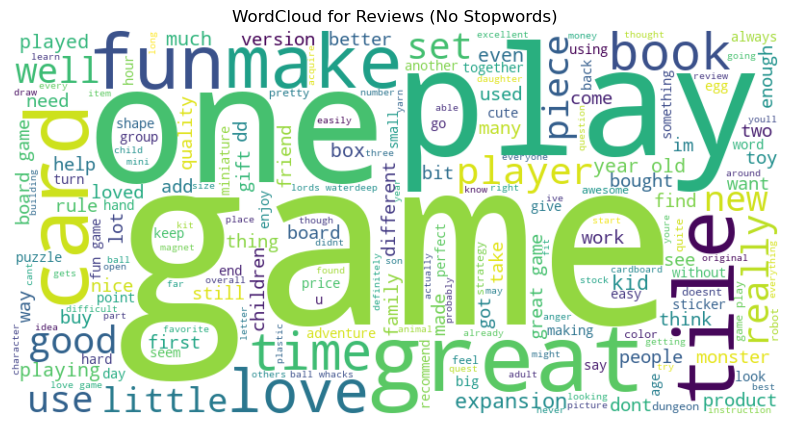

In [155]:
# Plot the wordcloud image.
review_wc_clean = WordCloud(width=800, height=400, background_color='white').generate(review_text_clean)

plt.figure(figsize=(10,5))
plt.imshow(review_wc_clean, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Reviews (No Stopwords)")
plt.show()

### 4d) Identify 15 most common words and polarity

In [156]:
# Determine the 15 most common words.
common_words = fdist_review.most_common(15)
print("Top 15 Most Common Words in Reviews:", common_words)

# Determine polarity.
from textblob import TextBlob

# Apply polarity scoring
df_nlp['review_polarity'] = df_nlp['review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
# Preview
df_nlp[['review','review_polarity']].head()

Top 15 Most Common Words in Reviews: [('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]


,review,review_polarity
0,when it comes to a dms screen the space on the...,-0.036111
1,an open letter to galeforce9\n\nyour unpainted...,0.035952
2,nice art nice printing why two panels are fil...,0.116640
3,amazing buy bought it as a gift for our new dm...,0.578788
4,as my review of gf9s previous screens these we...,-0.316667


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [157]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [158]:
# Determine polarity of both columns.
df_nlp['review_polarity'] = df_nlp['review'].apply(generate_polarity)
df_nlp['summary_polarity'] = df_nlp['summary'].apply(generate_polarity)

# View output.
df_nlp[['review_polarity','summary_polarity']].head()

,review_polarity,summary_polarity
0,-0.036111,0.15
1,0.035952,-0.80
2,0.116640,0.00
3,0.578788,0.00
4,-0.316667,0.00


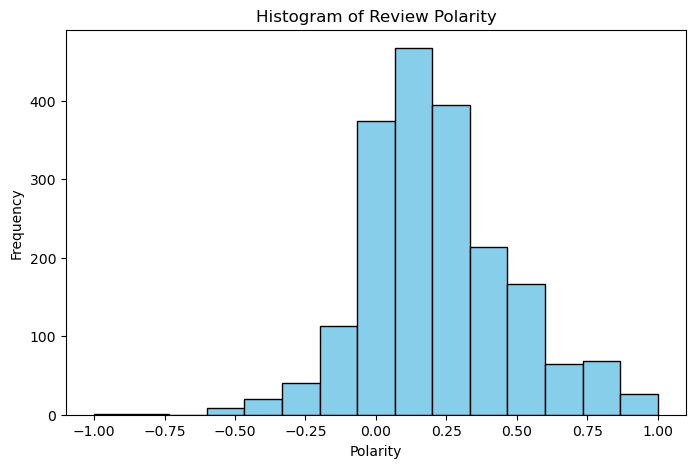

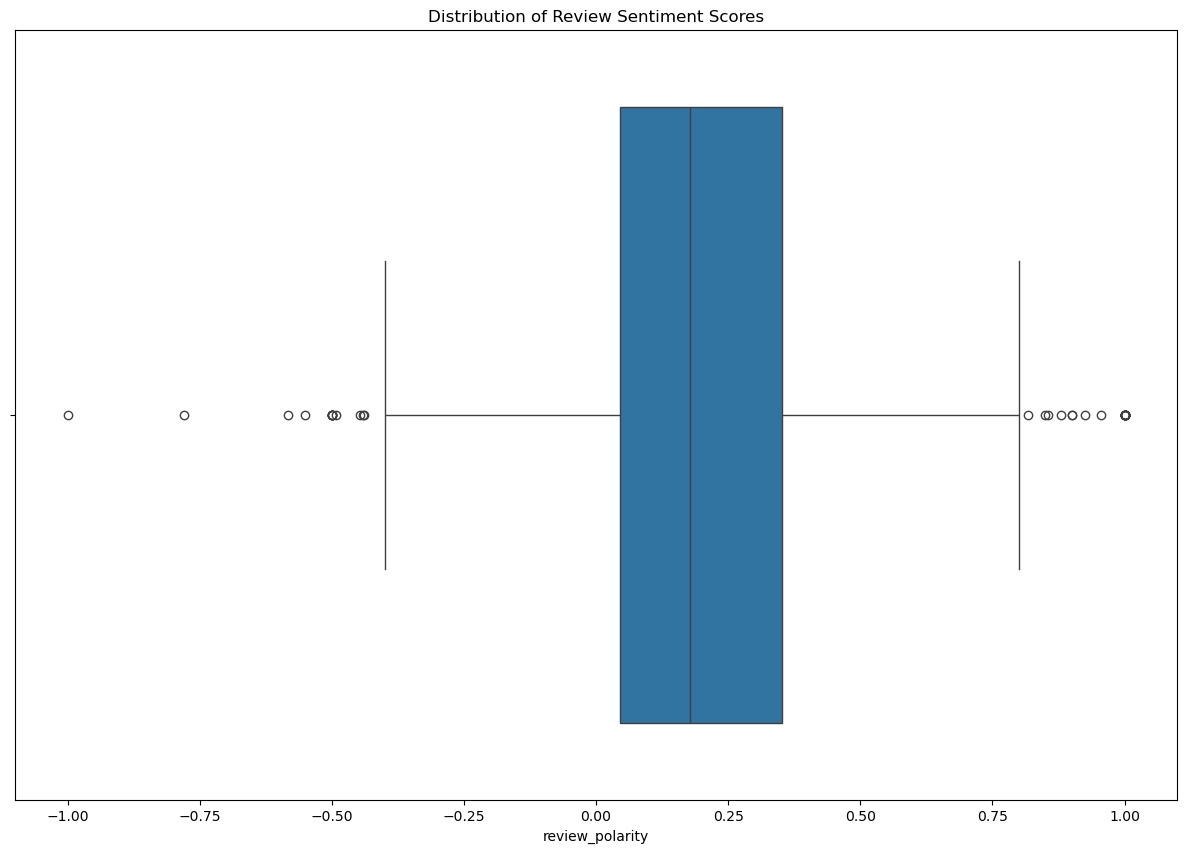

In [159]:
# Review: Create a histogram plot with bins = 15.
plt.figure(figsize=(8,5))
plt.hist(df_nlp['review_polarity'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Review Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()
# Histogram of sentiment score
sns.boxplot(x=df_nlp['review_polarity'])
plt.title("Distribution of Review Sentiment Scores")
plt.show()


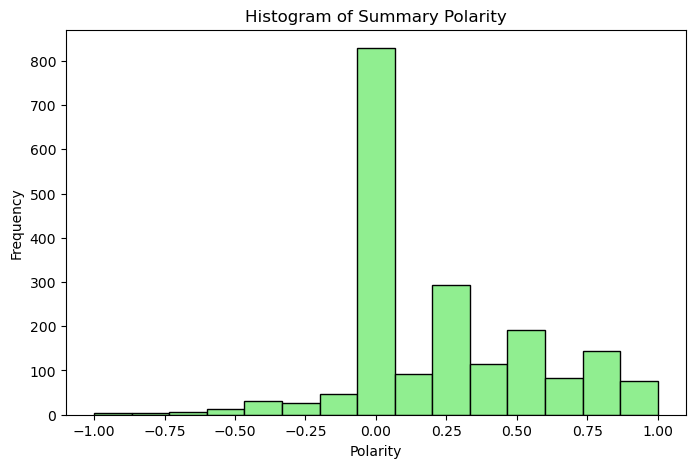

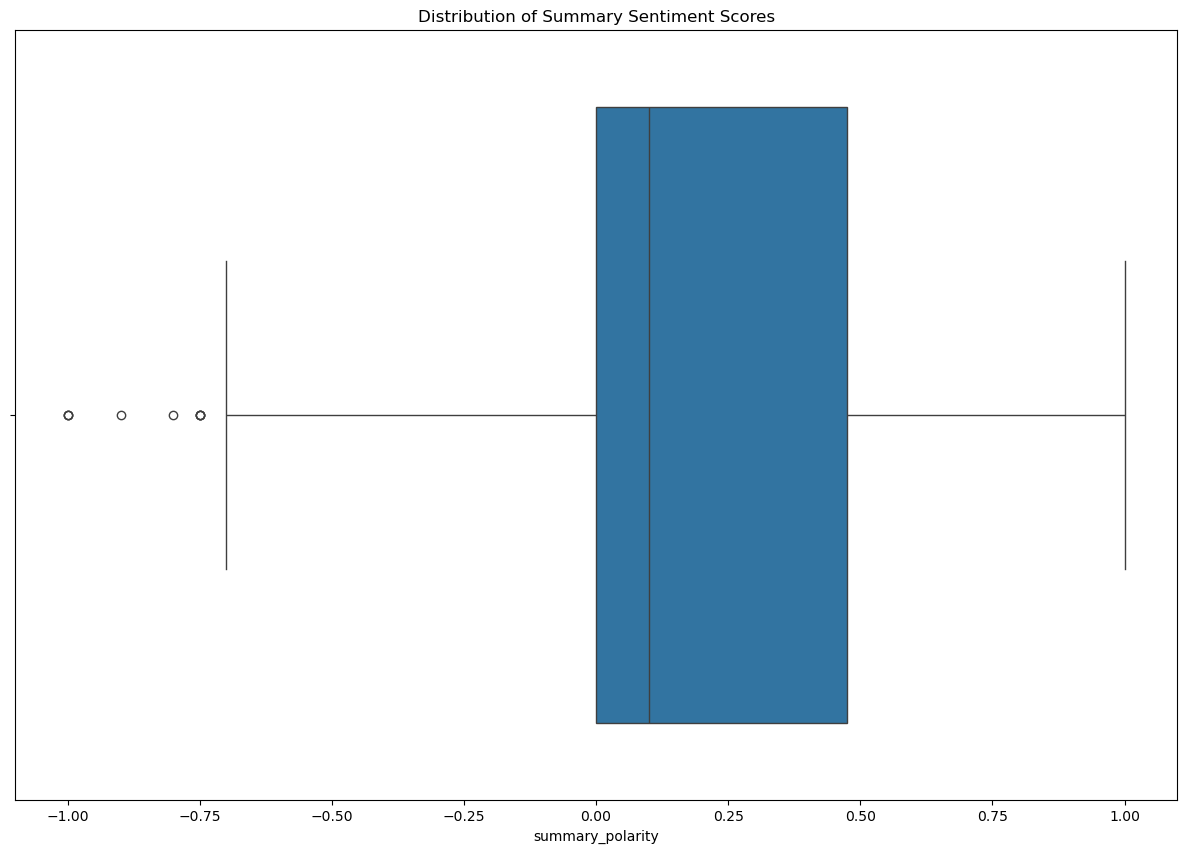

In [160]:
# Summary: Create a histogram plot with bins = 15.
plt.figure(figsize=(8,5))
plt.hist(df_nlp['summary_polarity'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Histogram of Summary Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# Histogram of sentiment score
sns.boxplot(x=df_nlp['summary_polarity'])
plt.title("Distribution of Summary Sentiment Scores")
plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [161]:
# Top 20 negative reviews.
top_negative_reviews = df_nlp.sort_values(by='review_polarity').head(20)[['review','review_polarity']]
# View output.
top_negative_reviews

,review,review_polarity
208,booo unles you are patient know how to measur...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
1524,expensive for what you get,-0.500000
117,i bought this as a christmas gift for my grand...,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
227,this was a gift for my daughter i found it di...,-0.500000


In [162]:
# Top 20 negative summaries.
top_negative_summaries = df_nlp.sort_values(by='summary_polarity').head(20)[['summary','summary_polarity']]
# View output.
top_negative_summaries

,summary,summary_polarity
208,boring unless you are a craft person which i am,-1.000000
21,the worst value ive ever seen,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
793,disappointed,-0.750000
1620,disappointed,-0.750000
144,disappointed,-0.750000
631,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


In [163]:
# Top 20 positive reviews.
top_positive_reviews = df_nlp.sort_values(by='review_polarity', ascending=False).head(20)[['review','review_polarity']]
# View output.
top_positive_reviews

,review,review_polarity
790,perfect,1.0
1726,excellent toy to simulate thought,1.0
194,awesome gift,1.0
1967,perfect for tutoring my grandson in spelling,1.0
1177,awesome addition to my rpg gm system,1.0
1168,best set buy 2 if you have the means,1.0
524,perfect just what i ordered,1.0
1715,awesome toy,1.0
1720,it is the best thing to play with and also min...,1.0
621,wonderful for my grandson to learn the resurre...,1.0


In [164]:
# Top 20 positive summaries.
top_positive_summaries = df_nlp.sort_values(by='summary_polarity', ascending=False).head(20)[['summary','summary_polarity']]
# View output.
top_positive_summaries

,summary,summary_polarity
1028,one of the best,1.0
1935,excellent,1.0
815,one of the best games ever,1.0
1630,awesome learning tool,1.0
163,he was very happy with his gift,1.0
1170,best orcs from wotc,1.0
1388,awesome expansion,1.0
1078,perfect gift,1.0
140,awesome sticker activity for the price,1.0
1171,awesome,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

The analysis of Turtle Games allowed us to see key patterns within customer behaviour and engagement. The Regression results suggested a positive relationship between remuneration and loyalty points, showing us that the higher income customers are more likely to engage regularly and furthermore show more loyalty. However this relationship is not uniform across all groups, which points to other influences such as age, education, and platform usage.
The Clustering analysis we undertook revealed four definate customer groups based on remuneration and spending behaviour. These varied from both high remuration and spending customers, who represent the organisation’s most profitable segment, to low remuartion and spending customers, these which provide a more limited return. With both these extremes, two mixed groups offered clear opportunities for growth through more tailored programms such as upselling and promotions.
This segmentation therefore provides an actionable framework for resource allocation and customer targeting.
Overall, the insights give a roadmap for not only strategical improvement but operations and marketing as well, with the potential to strengthen loyalty, optimise spending, and drive sustainable business growth.

# 